In [7]:
import itertools
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import time

In [22]:
def create_data():
    
    #reds
#     x1 = (139,0,0)
#     x2 = (255,0,0)
#     x3 = (220,20,60)
#     x4 = (128,0,0)
    
    x1 = (139,0,0)
    x2 = (255,99,71)
    x3 = (205,92,92)
    x4 = (220,20,60)
    
    #blues
    x5 = (0,0,255)
    x6 = (0,0,139)
    x7 = (135,206,235)
    x8 = (0,191,255)
    
#     x5 = (135,206,235)
#     x6 = (176,224,230)
#     x7 = (135,206,250)
#     x8 = (30,144,255)
    
#     x5 = (24,103,165)
#     x6 = (204,233,255)
#     x7 = (0,50,97)
#     x8 = (143,198,239)
       
    #greens
    x9 = (0,255,0)
    x10 = (0,128,0)
    x11 = (107,142,35)
    x12 = (46,139,87) 
    
#     x9 = (144,238,144)
#     x10 = (170,215,65)
#     x11 = (143,188,143)
#     x12 = (136,156,50)
    
    #pinks
    x13 = (255,192,203)
    x14 = (219,112,147)
    x15 = (221,160,221)
    x16 = (255,20,147)
    
#     x13 = (255,192,203)
#     x14 = (255,182,193)
#     x15 = (219,124,135)
#     x16 = (239,176,183)

#     x13 = (219,124,135)
#     x14 = (239,176,183)
#     x15 = (252,217,220)
#     x16 = (255,233,235)
      
    #teals
    x17 = (0,128,128)
    x18 = (102,178,178)
    x19 = (110,177,162)
    x20 = (142,194,182)

#     x17 = (0,128,128)
#     x18 = (32,178,170)
#     x19 = (72,209,204)
#     x20 = (0,255,255)
    
#     x17 = (0,102,102)
#     x18 = (0,128,128)
#     x19 = (102,178,178)
#     x20 = (0,76,76)
    
    
    #yellow
    x21 = (255,215,0)
    x22 = (255,255,0)
    x23 = (255,241,102)
    x24 = (255,237,59)
    
    
#     x21 = (255,215,0)
#     x22 = (255,255,0)
#     x23 = (255,140,0)
#     x24 = (218,165,32)

    data = (x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24)
    
    data = np.asarray(data)/255
    
    np.random.shuffle(data)
    
    return data

   
# initialize all weights to random values between 0 and 1
def init_weights():
    weights = np.random.rand(100,100,3)
    return weights


# create a nxn matrix to store all performance index values
def winning_neuron_matrix(weights, data):
    
    # from each neuron subtract the data 
    I_matrix = np.sum(np.power(data-weights,2),axis=2)

    return I_matrix

# return the winning neuron
def get_winning_neuron(I_matrix):
    
    #find index of winning neuron and return it
    index = np.unravel_index(I_matrix.argmin(), I_matrix.shape)
    return index
    
    
# create distance matrix, each index stores the distance from winning matrix
def get_distance_matrix(index_dist, I_matrix, min_index):
        
    # subtract from each neuron index subtract winning neuron index
    dist_sub = index_dist - np.asarray(min_index)    
    
    # square each subtraction, sum the squares and perform a squareroot on each summation
    dist_matrix = np.sqrt(np.sum(np.power(dist_sub,2),axis=2))

    return dist_matrix


# create matrix to store topological neighbourhood of each neuron
def get_neighborhood_matrix(dist_matrix, curr_epoch, total_epoch, sigma):
    
    # calculate sigma
    sigma_k = sigma*np.exp(-curr_epoch/total_epoch)
    
    #return all the topological neighbood values for all neurons
    return np.exp(-np.power(dist_matrix,2)/(2*np.power(sigma_k,2)))


# update all weights
def update_weights(data, weights, alpha, nbh_matrix, curr_epoch, total_epoch):
    
    # compute new learning rate
    learning_rate = alpha*np.exp(-curr_epoch/total_epoch)
    
    # update weights
    weights = weights + learning_rate*nbh_matrix.reshape(100,100,1)*(data-weights)
    
    return weights
    

In [23]:
def train_network(sigma):
    
    # create data and init weights
    data = create_data()
    weights = init_weights()
    
    init_weight = weights
    
    x = [i for i in range(0,100)]
    y = [i for i in range(0,100)]

    index_dist = np.asarray(list(itertools.product(x, y)))
    index_dist = index_dist.reshape(100,100,2)

    T = 1000
    alpha = 0.8
    
    save_weights = []
    fig, axs = plt.subplots(2,3, figsize = (15,10))

    for k in range(T):
        
        for i in range(24):

            I_matrix = winning_neuron_matrix(weights, data[i])

            winning_neuron_index = get_winning_neuron(I_matrix)

            dist_matrix = get_distance_matrix(index_dist, I_matrix, winning_neuron_index)

            nbh_matrix = get_neighborhood_matrix(dist_matrix,k,T,sigma)

            weights = update_weights(data[i], weights, alpha, nbh_matrix, k, T)
        
        if (k==19 or k==39 or k==99 or k==999):
            save_weights.append(weights)
        
    title = "SOM Map with Random Weights"
    axs[0, 0].set_title(title)
    axs[0, 0].imshow(init_weight)

    title = "Sigma " + str(sigma) + " at Epoch " + str(20)
    axs[0, 1].set_title(title)
    axs[0, 1].imshow(save_weights[0])

    title = "Sigma " + str(sigma) + " at Epoch " + str(40)
    axs[0, 2].set_title(title)
    axs[0, 2].imshow(save_weights[1])

    title = "Sigma " + str(sigma) + " at Epoch " + str(100)
    axs[1, 0].set_title(title)
    axs[1, 0].imshow(save_weights[2])

    title = "Sigma " + str(sigma) + " at Epoch " + str(1000)
    axs[1, 1].set_title(title)
    axs[1, 1].imshow(save_weights[3])
    
    fig.delaxes(axs[1,2])
    
    fig.tight_layout (pad = 3)

In [ ]:
train_network(1)

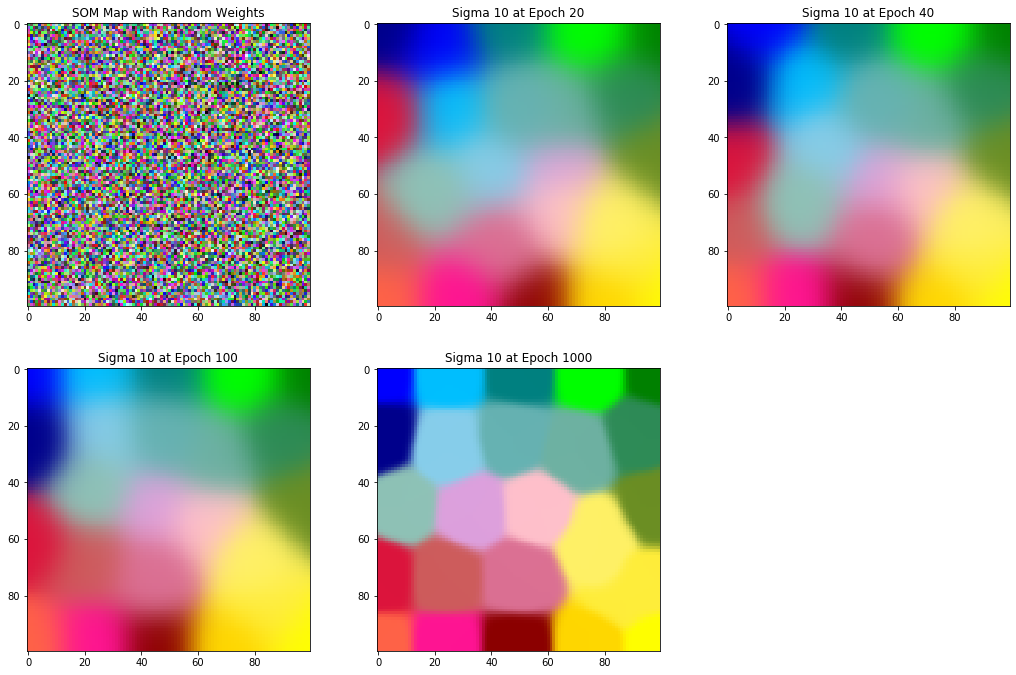

In [24]:
train_network(10)

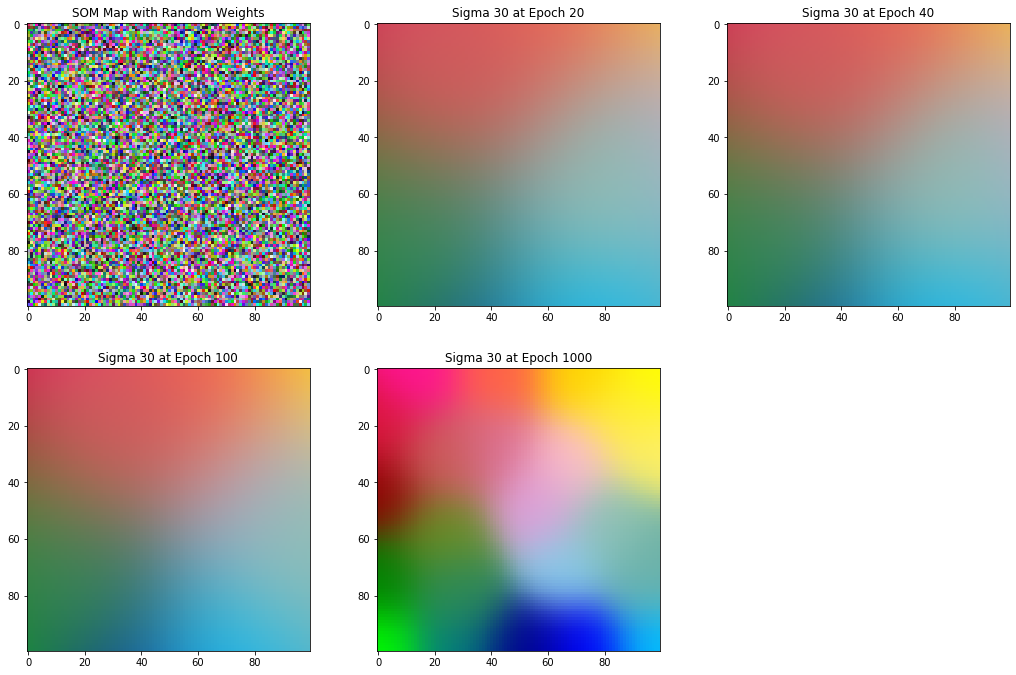

In [25]:
train_network(30)

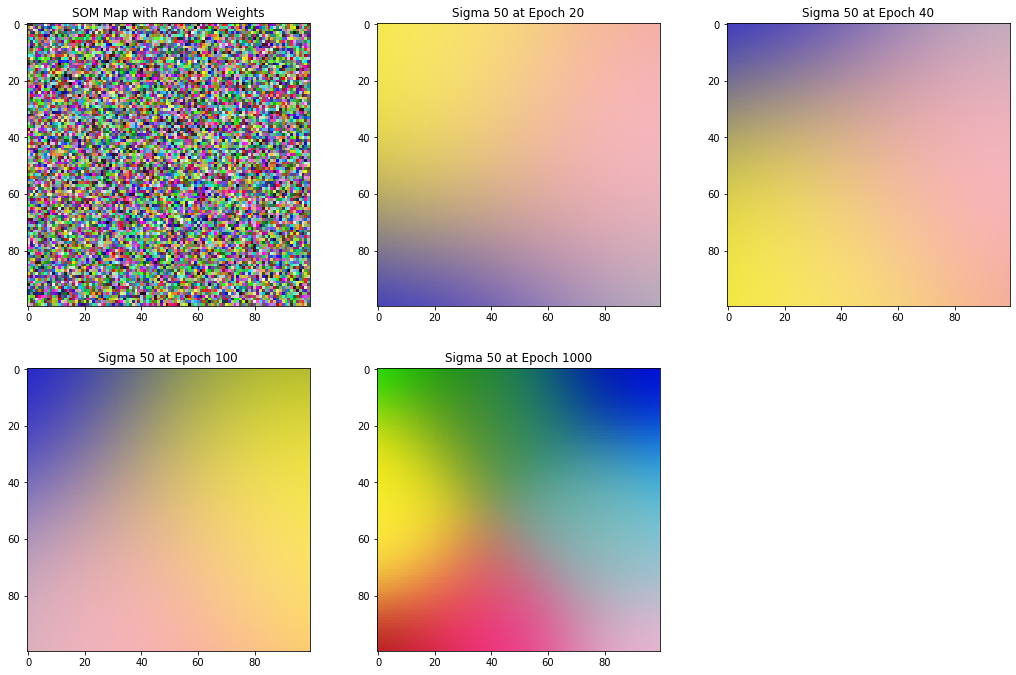

In [26]:
train_network(50)

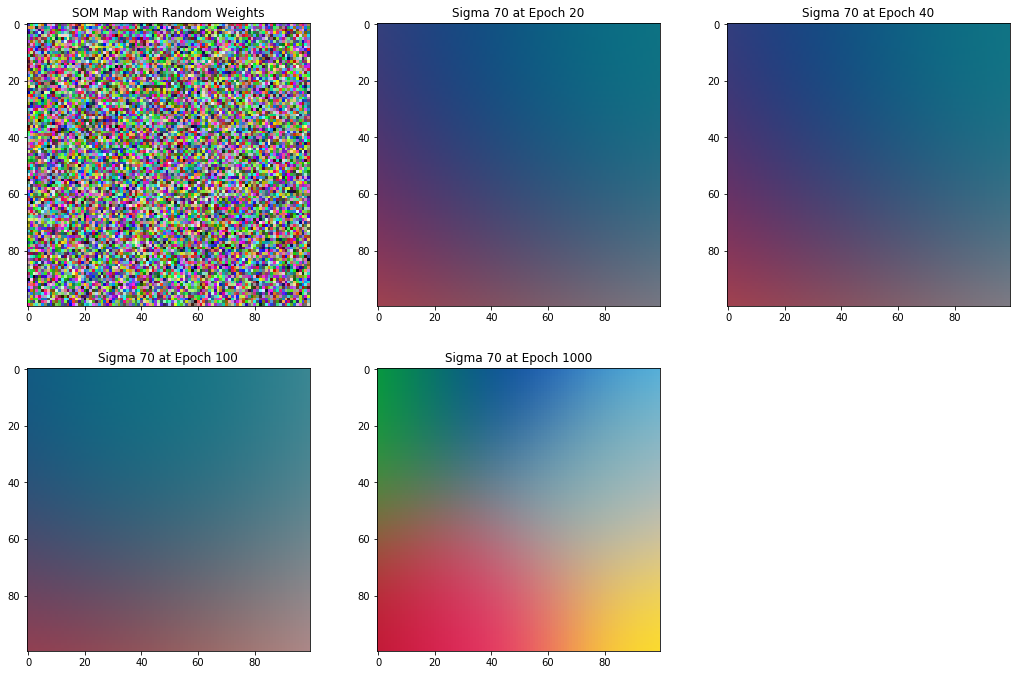

In [27]:
train_network(70)